In [34]:
%env PYART_QUIET=true

env: PYART_QUIET=true


In [35]:
# !pip3 install arm-pyart

In [36]:
import pyart

In [37]:
processing_data = pyart.io.read_sigmet("/Users/tuphamminh/Documents/GitHub/MF-Airflow/data/NHB230601005302.RAWLH11")

## Investigate basic data

In [38]:
processing_data.fields.keys()

dict_keys(['total_power', 'reflectivity', 'velocity', 'spectrum_width'])

In [59]:
# processing_data.fields['normalized_coherent_power']
processing_data.fields['velocity']

{'units': 'meters_per_second',
 'standard_name': 'radial_velocity_of_scatterers_away_from_instrument',
 'long_name': 'Mean dopper velocity',
 'coordinates': 'elevation azimuth range',
 'data': masked_array(
   data=[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],
   mask=[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],
   fill_value=1e+20,
   dtype=float32),
 '_FillValue': -9999.0}

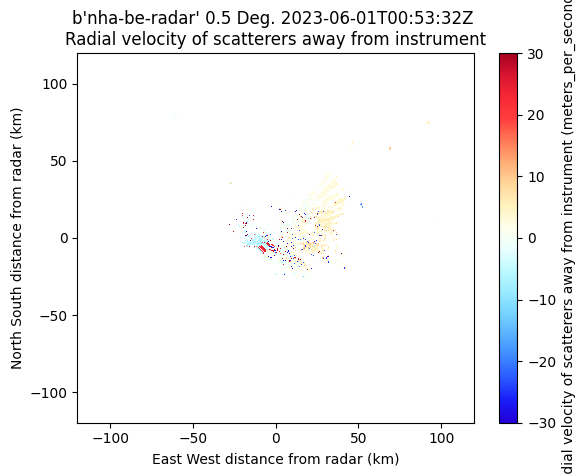

In [60]:
display = pyart.graph.RadarDisplay(processing_data)
display.plot_ppi("velocity")
#1-0:20:36 1-0:23:20 1-0:30:25 1-0:33:08 1-0:40:17 1-0:43:41 1-0:50:49 1-0:53:32

## Convert to Grid coordinate

In [62]:
processed_grid = pyart.map.grid_from_radars(
    processing_data,
    grid_shape=(1, 1000, 1000),
    grid_limits=((0, 100), (-50_000, 50_000), (-50_000, 50_000)),
)

In [45]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyart/graph/gridmapdisplay.py:239: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


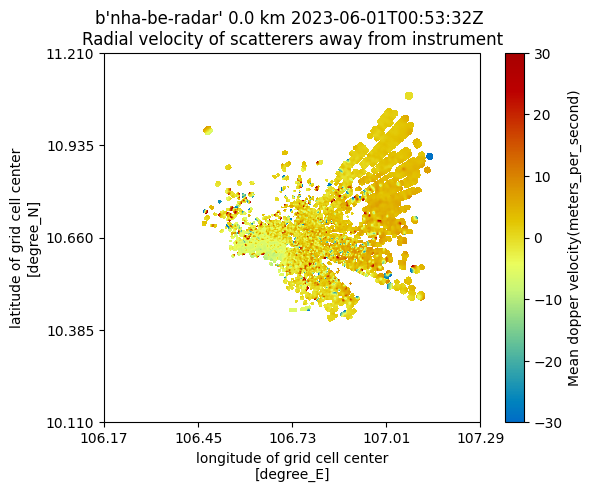

In [64]:
grid_display = pyart.graph.GridMapDisplay(processed_grid)
grid_display.plot_grid('velocity', cmap='pyart_HomeyerRainbow')

In [47]:
processed_grid.get_projparams()

{'proj': 'pyart_aeqd',
 'lon_0': 106.72833329066634,
 'lat_0': 10.659610088914633}

In [48]:
processed_grid.get_point_longitude_latitude()

(array([[106.27144226, 106.27235696, 106.27327165, ..., 107.18339493,
         107.18430962, 107.18522432],
        [106.27144095, 106.27235565, 106.27327035, ..., 107.18339623,
         107.18431093, 107.18522563],
        [106.27143964, 106.27235434, 106.27326904, ..., 107.18339754,
         107.18431224, 107.18522694],
        ...,
        [106.27009324, 106.27101064, 106.27192803, ..., 107.18473855,
         107.18565595, 107.18657334],
        [106.27009184, 106.27100924, 106.27192664, ..., 107.18473994,
         107.18565734, 107.18657474],
        [106.27009045, 106.27100785, 106.27192525, ..., 107.18474133,
         107.18565873, 107.18657613]]),
 array([[10.20962205, 10.20962336, 10.20962467, ..., 10.20962467,
         10.20962336, 10.20962205],
        [10.21052227, 10.21052357, 10.21052488, ..., 10.21052488,
         10.21052357, 10.21052227],
        [10.21142248, 10.21142379, 10.21142509, ..., 10.21142509,
         10.21142379, 10.21142248],
        ...,
        [11.107133

## Todo

- [ ] Return data as numpy

In [31]:
type(processed_grid.fields['reflectivity']['data'])

numpy.ma.core.MaskedArray

In [33]:
# processed_grid.fields['reflectivity']['data'].shape
processed_grid.fields['reflectivity']['data'].data[0]

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  7.9000645, 11.459999 ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  9.784357 , 11.46     ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  9.826749 , 11.46     ,
         0.       ]], dtype=float32)

In [14]:
processed_grid.fields['reflectivity']['data'][:, 10]

masked_array(data=[[--, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, 8.25, 15.074152946472168, 15.377973556518555,
                    15.549434661865234, 15.648307800292969,
                    15.700532913208008, 15.813572883605957,
                    15.831258773803711]],
             mask=[[ True,  True,  True,  True,  True,  True,  True,
                     True,  True,  True,  True,  True,  True,  True,
                     True,  True,  True,  True,  True,  True,  True,
                     True,  True,  True,  True,  True,  T